In [31]:
import pandas as pd
pd.options.display.max_columns=200
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.pipeline import make_pipeline
import bs4 as bs
import nltk
from nltk.corpus import stopwords, words
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize, RegexpTokenizer
from wordcloud import WordCloud
from PIL import Image
from pandarallel import pandarallel

In [32]:
'''nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw')
nltk.download('punkt')'''

"nltk.download('stopwords')\nnltk.download('words')\nnltk.download('wordnet')\nnltk.download('omw')\nnltk.download('punkt')"

In [33]:
data = pd.read_csv('data/QueryResults.csv')

In [34]:
data.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,how do I calculate a rolling idxmax,<p>consider the <code>pd.Series</code> <code>s...,<python><pandas><numpy><dataframe><series>,40101130,9,7584,0.0,6
1,Better techniques for trimming leading zeros i...,"<p>I've been using <a href=""https://stackoverf...",<sql><sql-server><sql-server-2005><tsql><string>,662383,197,388401,0.0,19
2,"""No X11 DISPLAY variable"" - what does it mean?",<p>I am trying to install a Java application o...,<java><linux><variables><x11><headless>,662421,122,622820,0.0,12
3,Object-Oriented Callbacks for C++?,<p>Is there some library that allows me to eas...,<c++><oop><callback><pointer-to-member><eiffel>,3520133,9,10228,0.0,6
4,Why doesn't .NET find the OpenSSL.NET dll?,"<p><strong>EDIT</strong> (the whole question, ...",<c#><.net><dll><dllimport><dllnotfoundexception>,1396164,9,18554,0.0,12


In [35]:
#delete balises html with beautiful soup
def clean_html(text):
    soup = bs.BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['Body'] = data['Body'].apply(clean_html)

In [36]:
data.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,how do I calculate a rolling idxmax,consider the pd.Series s\nimport pandas as pd\...,<python><pandas><numpy><dataframe><series>,40101130,9,7584,0.0,6
1,Better techniques for trimming leading zeros i...,I've been using this for some time:\nSUBSTRING...,<sql><sql-server><sql-server-2005><tsql><string>,662383,197,388401,0.0,19
2,"""No X11 DISPLAY variable"" - what does it mean?",I am trying to install a Java application on m...,<java><linux><variables><x11><headless>,662421,122,622820,0.0,12
3,Object-Oriented Callbacks for C++?,Is there some library that allows me to easily...,<c++><oop><callback><pointer-to-member><eiffel>,3520133,9,10228,0.0,6
4,Why doesn't .NET find the OpenSSL.NET dll?,"EDIT (the whole question, it was too unclear)\...",<c#><.net><dll><dllimport><dllnotfoundexception>,1396164,9,18554,0.0,12


In [37]:
data.sample(5)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
17676,Convert UTC to local time in Rails 3,I'm having trouble converting a UTC Time or Ti...,<ruby-on-rails><ruby><ruby-on-rails-3><timezon...,5300493,100,114767,0.0,6
5562,Adding wsdl web reference in asp .Net Core pro...,I've got web service http://www.mcommunicator....,<c#><web-services><asp.net-web-api><visual-stu...,39106617,36,53425,0.0,1
25766,submitting PySpark app to spark on YARN in clu...,I'm trying to test a big data platform that ha...,<python><hadoop><apache-spark><pyspark><hadoop...,42956220,6,14258,0.0,3
12461,How to pass environment variables to the gradl...,I am trying to pass env variables locally with...,<java><spring><gradle><command-line><environme...,59741629,17,47420,0.0,6
18765,Access files from network share in c# web app,I have a web application that needs to read (a...,<c#><asp.net><security><web-applications><file...,29346,10,31585,0.0,5


In [38]:
data = data[['Title', 'Body', 'Tags', 'Id']]

In [39]:
data.set_index('Id', inplace=True)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 40101130 to 53180854
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   50000 non-null  object
 1   Body    50000 non-null  object
 2   Tags    50000 non-null  object
dtypes: object(3)
memory usage: 1.5+ MB


In [41]:
data.nunique()

Title    49999
Body     50000
Tags     49190
dtype: int64

In [42]:
data.isna().sum()

Title    0
Body     0
Tags     0
dtype: int64

In [43]:
data.describe(include=object)

,Title,Body,Tags
count,50000,50000,50000
unique,49999,50000,49190
top,A potentially dangerous Request.Form value was...,consider the pd.Series s\nimport pandas as pd\...,<angular><typescript><ionic-framework><ionic2>...
freq,2,1,24


In [44]:
data.Body.apply(lambda i : len(i))

Id
40101130     754
662383       585
662421      2111
3520133     1307
1396164     1165
            ... 
3915827      195
71419635    2821
22050813     450
53180817    1179
53180854    1449
Name: Body, Length: 50000, dtype: int64

(0.0, 10000.0)

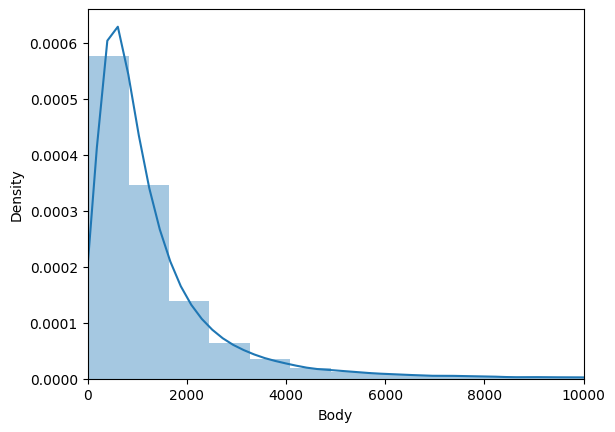

In [45]:
tmp = data.Body.str.len()
sns.distplot(tmp)
plt.xlim(0, 10000)

<AxesSubplot: xlabel='Title', ylabel='Density'>

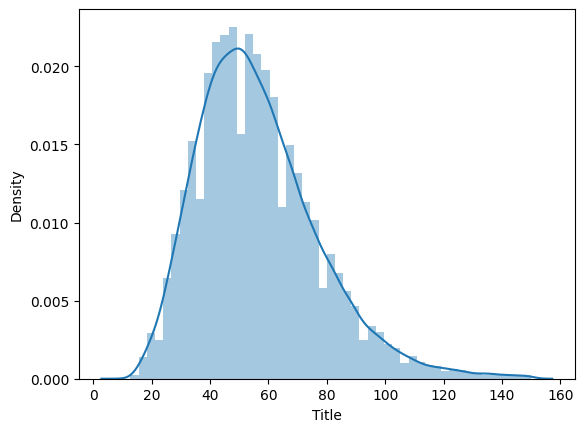

In [46]:
tmp = data.Title.str.len()
sns.distplot(tmp)

In [47]:
data.shape

(50000, 3)

In [48]:
for idx, ser in data.sample(3).iterrows():
      print(ser['Title'])
      print(ser['Body'])
      print(ser['Tags'])
      print('')
      print('----'*30)
      print('')

Unit testing jersey Restful Services
I'm new to unit testing and I want to test some jersey services in a project. We are using Junit. Please guide me to write test cases in better way.
CODE:
    @GET
    @Path("/getProducts/{companyID}/{companyName}/{date}")
    @Produces(MediaType.APPLICATION_JSON)
    public Object getProducts(@PathParam("companyID") final int companyID,
            @PathParam("date") final String date, @PathParam("companyName") final String companyName)
            throws IOException {
        return productService.getProducts(companyID, companyName, date);
    }

Above mentioned service is working fine and I want to write junit test case to test above mentioned method. Above method will retrieve list of products (List<Product>) in JSON format. I would like to write test case to check response status and json format.
NOTE: We are using Jersey 1.17.1 version.
Help would be appreciated :)

<java><json><unit-testing><rest><junit>

-------------------------------------

In [49]:
data.head()

,Title,Body,Tags
Id,,,
40101130,how do I calculate a rolling idxmax,consider the pd.Series s\nimport pandas as pd\...,<python><pandas><numpy><dataframe><series>
662383,Better techniques for trimming leading zeros i...,I've been using this for some time:\nSUBSTRING...,<sql><sql-server><sql-server-2005><tsql><string>
662421,"""No X11 DISPLAY variable"" - what does it mean?",I am trying to install a Java application on m...,<java><linux><variables><x11><headless>
3520133,Object-Oriented Callbacks for C++?,Is there some library that allows me to easily...,<c++><oop><callback><pointer-to-member><eiffel>
1396164,Why doesn't .NET find the OpenSSL.NET dll?,"EDIT (the whole question, it was too unclear)\...",<c#><.net><dll><dllimport><dllnotfoundexception>


In [50]:
def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')', "'", '"', '!', ';', '``', "''", '...', '’', '“', '”']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
                                       and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

In [51]:
X = data['Body'].transform(lambda i : transform_bow_lem_fct(i))

In [ ]:
df = pd.DataFrame(X)
df['Title'] = data['Title'].apply(lambda i : transform_bow_lem_fct(i))
df ['Tags'] = data['Tags']

In [ ]:
df.head()

,Body,Title,Tags
Id,,,
40101130,consider pd.series import panda import numpy n...,calculate rolling idxmax,<python><pandas><numpy><dataframe><series>
662383,'ve using time substring str_col patindex str_...,better technique trimming leading zero sql server,<sql><sql-server><sql-server-2005><tsql><string>
662421,trying install java application linux machine ...,x11 display variable mean,<java><linux><variables><x11><headless>
3520133,library allows easily conveniently create obje...,object oriented callback,<c++><oop><callback><pointer-to-member><eiffel>
1396164,edit whole question unclear want use openssl.n...,why n't .net find openssl.net dll,<c#><.net><dll><dllimport><dllnotfoundexception>


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 40101130 to 53180854
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    50000 non-null  object
 1   Title   50000 non-null  object
 2   Tags    50000 non-null  object
dtypes: object(3)
memory usage: 1.5+ MB


In [ ]:
for idx, ser in df.sample(3).iterrows():
      print(ser['Title'])
      print(ser['Body'])
      print(ser['Tags'])
      print('')
      print('----'*30)
      print('')

how use avx pclmulqdq mac
trying compile program us pclmulqdq instruction present new intel processor 've installed gcc 4.6 using macports compile program us intrinsic _mm_clmulepi64_si128 get var folder sfjmtgx5771_qbqnh4c9xclr0000gn cceawwhd.s:16 instruction pclmulqdq xmm0 xmm1' seems gcc able generate correct assembly code instrinsic assembler recognize instruction 've installed binutils using macports problem persists how know assembler gcc using the xcode assembler probably support binutils assembler
<gcc><assembly><osx-lion><macports><avx>

------------------------------------------------------------------------------------------------------------------------

msbuild support template visual studio 2017 rtm
visual studio 2015 using nuget package unofficial.microsoft.visualstudio.texttemplating.14.0.0 allows transform template directly msbuild whenever project built visual studio 2017 rtm however break build following message exception thrown running transformation code the proces

In [ ]:
df.shape

(50000, 3)

In [ ]:
df['text'] = df['Title'] + '    ' + df['Body']

In [ ]:
df.head()

,Body,Title,Tags,text
Id,,,,
40101130,consider pd.series import panda import numpy n...,calculate rolling idxmax,<python><pandas><numpy><dataframe><series>,calculate rolling idxmax consider pd.series...
662383,'ve using time substring str_col patindex str_...,better technique trimming leading zero sql server,<sql><sql-server><sql-server-2005><tsql><string>,better technique trimming leading zero sql ser...
662421,trying install java application linux machine ...,x11 display variable mean,<java><linux><variables><x11><headless>,x11 display variable mean trying install ja...
3520133,library allows easily conveniently create obje...,object oriented callback,<c++><oop><callback><pointer-to-member><eiffel>,object oriented callback library allows eas...
1396164,edit whole question unclear want use openssl.n...,why n't .net find openssl.net dll,<c#><.net><dll><dllimport><dllnotfoundexception>,why n't .net find openssl.net dll edit whol...


In [ ]:
import re

# Suppression des chevrons et extraction des tags
df['Tags'] = df['Tags'].apply(lambda x: re.findall(r'<([^>]+)>', x))

df.head()

,Body,Title,Tags,text
Id,,,,
40101130,consider pd.series import panda import numpy n...,calculate rolling idxmax,"[python, pandas, numpy, dataframe, series]",calculate rolling idxmax consider pd.series...
662383,'ve using time substring str_col patindex str_...,better technique trimming leading zero sql server,"[sql, sql-server, sql-server-2005, tsql, string]",better technique trimming leading zero sql ser...
662421,trying install java application linux machine ...,x11 display variable mean,"[java, linux, variables, x11, headless]",x11 display variable mean trying install ja...
3520133,library allows easily conveniently create obje...,object oriented callback,"[c++, oop, callback, pointer-to-member, eiffel]",object oriented callback library allows eas...
1396164,edit whole question unclear want use openssl.n...,why n't .net find openssl.net dll,"[c#, .net, dll, dllimport, dllnotfoundexception]",why n't .net find openssl.net dll edit whol...


In [ ]:
import ast

# Transformer les chaînes de caractères en listes de tags
df['Tags'] = df['Tags'].apply(lambda x: ast.literal_eval(x))
df['Tags'].head()

ValueError: malformed node or string: ['python', 'pandas', 'numpy', 'dataframe', 'series']

In [ ]:
import ast

# Transformer les chaînes de caractères en listes de tags
data_bow['Tags'] = data_bow['Tags'].apply(lambda x: ast.literal_eval(x))
data_bow['Tags'].head()

0          [python, pandas, numpy, dataframe, series]
1    [sql, sql-server, sql-server-2005, tsql, string]
2             [java, linux, variables, x11, headless]
3     [c++, oop, callback, pointer-to-member, eiffel]
4    [c#, .net, dll, dllimport, dllnotfoundexception]
Name: Tags, dtype: object

In [ ]:
df.to_csv("data/data_bow.csv")